In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config) 

In [2]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# import numpy as np

# data=np.load('data.npy')
# target=np.load('target.npy')
# from sklearn.model_selection import train_test_split

# train_datagen,test_datagen,training_set,test_set=train_test_split(data,target,test_size=0.2)


In [3]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [4]:
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10356 images belonging to 2 classes.
Found 3452 images belonging to 2 classes.


In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [6]:
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a third convolutional layer and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a 4th convolutional layer and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear'))

In [7]:
## for mulitclassification
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge')

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          9

In [17]:
# Part 3 - Training the CNN

# Compiling the CNN

# cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
324/324 [==============================] - 50s 154ms/step - loss: 0.0676 - accuracy: 0.9744 - val_loss: 0.1696 - val_accuracy: 0.9444
Epoch 2/30
324/324 [==============================] - 50s 155ms/step - loss: 0.0664 - accuracy: 0.9777 - val_loss: 0.1661 - val_accuracy: 0.9447
Epoch 3/30
324/324 [==============================] - 50s 154ms/step - loss: 0.0666 - accuracy: 0.9761 - val_loss: 0.1544 - val_accuracy: 0.9522
Epoch 4/30
324/324 [==============================] - 49s 150ms/step - loss: 0.0653 - accuracy: 0.9750 - val_loss: 0.2470 - val_accuracy: 0.9253
Epoch 5/30
324/324 [==============================] - 49s 151ms/step - loss: 0.0639 - accuracy: 0.9758 - val_loss: 0.1760 - val_accuracy: 0.9450
Epoch 6/30
324/324 [==============================] - 49s 152ms/step - loss: 0.0639 - accuracy: 0.9778 - val_loss: 0.1551 - val_accuracy: 0.9516
Epoch 7/30
324/324 [==============================] - 48s 149ms/step - loss: 0.0654 - accuracy: 0.9759 - val_loss: 0.2244 - val_ac

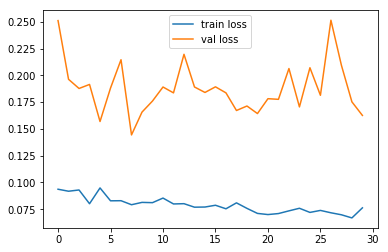

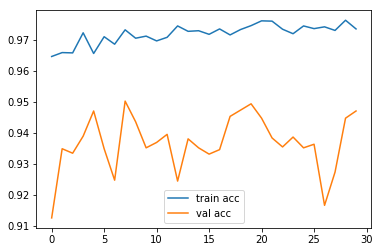

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [11]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('SvmAndCnn.h5')
from tensorflow.keras.models import load_model
 
# load model
model = load_model('SvmAndCnn.h5')

In [ ]:
'dataset/Covid19 Positive/Covid-142.png'
'dataset/Covid19 Negative/Normal-2.png'

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('dataset/Covid19 Positive/Covid-142.png', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
type(result)

[[5.6885383e-03 9.9243659e-01 1.0980228e-03 7.7682320e-04]]


numpy.ndarray

In [167]:
# # Convert array to list
# lis = result.tolist()
# print(type(lis))



<class 'list'>


[[0.999968409538269,
  3.164418012602255e-05,
  3.817092038453421e-28,
  1.5439812030050606e-28]]

In [169]:
# convert multi dimension list to a single list
# flatList = [ item for elem in result for item in elem]

In [170]:
# flatList

0.9999684

In [156]:
# new_numbers = [];
# for n in flatList:
#     new_numbers.append(int(n));
# numbers = new_numbers;

In [157]:
# integers = numbers

# strings = [str(integer) for integer in integers]
# a_string = "".join(strings)
# an_integer = int(a_string)

# print(an_integer)

0


In [ ]:
# if an_integer<0:
#     print("normal")
# else:
#     print("Covid")